In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/Employee_attrition_data/employee_attrition_data.csv")
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [3]:
df.describe()

,Employee_ID,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,288.819436,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,0.000000,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,249.750000,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,499.500000,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,749.250000,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,999.000000,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [4]:
df.isna().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=["Employee_ID"], inplace=True)

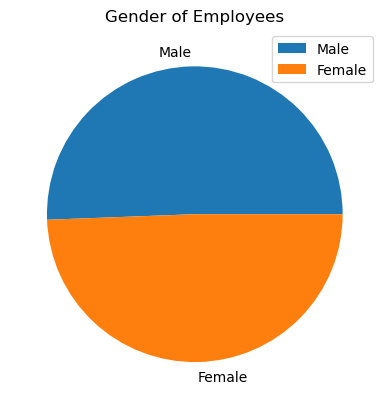

In [7]:
df["Gender"].value_counts().plot(kind="pie")
plt.title("Gender of Employees")
plt.ylabel("")
plt.legend()
plt.show()

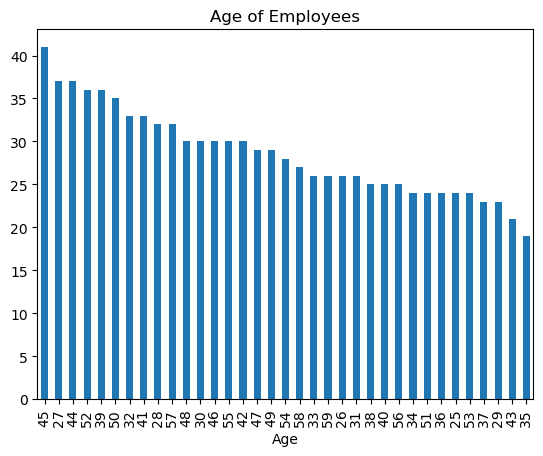

In [8]:
df["Age"].value_counts().plot(kind="bar")
plt.title("Age of Employees")
plt.show()

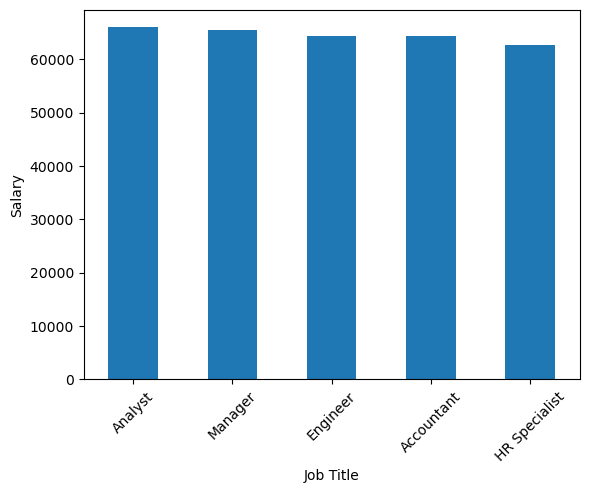

In [9]:
df.groupby("Job_Title")["Salary"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["Department"] = le.fit_transform(df["Department"])
df["Job_Title"] = le.fit_transform(df["Job_Title"])

df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,1,3,4,9,0.586251,151,0,60132,0
1,53,0,4,2,10,0.261161,221,1,79947,0
2,59,0,3,1,8,0.304382,184,0,46958,1
3,42,0,0,4,1,0.480779,242,0,40662,0
4,44,0,4,2,10,0.636244,229,1,74307,0


In [11]:
correlation = df.corr(numeric_only=True).sort_values("Salary", ascending=False)
correlation

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
Salary,-0.018682,-0.071373,0.049333,-0.005134,0.036053,-0.027073,-0.054562,0.017260,1.000000,-0.037818
Department,0.023329,-0.023710,1.000000,0.017153,-0.020653,0.019207,-0.019631,0.064195,0.049333,-0.050356
Years_at_Company,0.018837,0.022598,-0.020653,-0.010053,1.000000,-0.032470,-0.060726,-0.010661,0.036053,0.003208
Promotion_Last_5Years,0.039444,-0.007668,0.064195,-0.052379,-0.010661,0.002927,-0.031318,1.000000,0.017260,0.017728
Job_Title,-0.019158,-0.027999,0.017153,1.000000,-0.010053,-0.021041,-0.030540,-0.052379,-0.005134,0.006921
Age,1.000000,0.036815,0.023329,-0.019158,0.018837,0.021263,-0.031304,0.039444,-0.018682,-0.008685
Satisfaction_Level,0.021263,0.053603,0.019207,-0.021041,-0.032470,1.000000,-0.008913,0.002927,-0.027073,-0.009601
Attrition,-0.008685,-0.033884,-0.050356,0.006921,0.003208,-0.009601,-0.023706,0.017728,-0.037818,1.000000
Average_Monthly_Hours,-0.031304,-0.064458,-0.019631,-0.030540,-0.060726,-0.008913,1.000000,-0.031318,-0.054562,-0.023706
Gender,0.036815,1.000000,-0.023710,-0.027999,0.022598,0.053603,-0.064458,-0.007668,-0.071373,-0.033884


<Axes: >

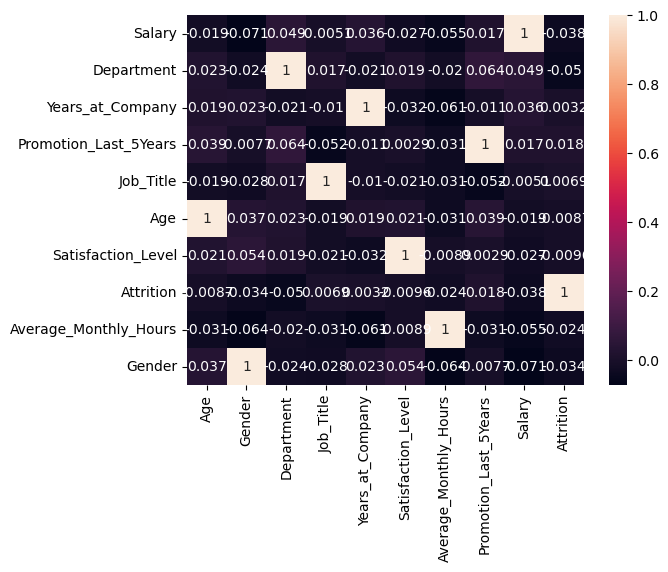

In [12]:
sns.heatmap(correlation, annot=True)

In [13]:
df.groupby("Salary")["Years_at_Company"].mean()

Salary
30099     3.0
30181     1.0
30194     6.0
30262     7.0
30269    10.0
         ... 
99672     6.0
99801     4.0
99851     4.0
99859     6.0
99991     1.0
Name: Years_at_Company, Length: 995, dtype: float64

In [14]:
df.groupby("Salary")["Age"].mean()

Salary
30099    26.0
30181    50.0
30194    57.0
30262    39.0
30269    28.0
         ... 
99672    26.0
99801    35.0
99851    44.0
99859    55.0
99991    58.0
Name: Age, Length: 995, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df[["Years_at_Company", "Satisfaction_Level", "Average_Monthly_Hours"]]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_train.shape)
print(X_test.shape)

(800, 3)
(200, 3)


In [16]:
import joblib
joblib.dump(sc, "scaler.pkl")

['scaler.pkl']

In [17]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [18]:
predict = lr.predict(X_test)

In [19]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predict)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predict)}")
print(f"Test Score: {lr.score(X_test, y_test)}")
print(f"Train Score: {lr.score(X_train, y_train)}")

Mean Absolute Error: 18465.74543095977
Mean Squared Error: 446762493.85128975
Test Score: -0.006836341244118138
Train Score: 0.006813155001638593


In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
svr.fit(X_train, y_train)

predict_svr = svr.predict(X_test)

In [21]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predict_svr)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predict_svr)}")
print(f"Test Score: {svr.score(X_test, y_test)}")
print(f"Train Score: {svr.score(X_train, y_train)}")

Mean Absolute Error: 18443.659975735474
Mean Squared Error: 445124556.023675
Test Score: -0.0031450391490728258


Train Score: -2.92333610112383e-05


In [22]:
svr_params = {"kernel": ["linear", "poly", "rbf"],
          "degree": [2, 3, 4],
          "C": [0.01, 0.1, 0.5]}

gs_svr = GridSearchCV(svr, svr_params)

gs_svr.fit(X_test, y_test)

gs_svr.best_params_

{'C': 0.5, 'degree': 3, 'kernel': 'poly'}

In [23]:
predict_gs_svr = gs_svr.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, predict_gs_svr)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predict_gs_svr)}")
print(f"Test Score: {gs_svr.score(X_test, y_test)}")
print(f"Train Score: {gs_svr.score(X_train, y_train)}")

Mean Absolute Error: 18425.814304692558
Mean Squared Error: 443728828.5803516
Test Score: 4.1090940394727937e-07
Train Score: -0.0013054734190167672


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, max_depth=3)

rf.fit(X_train, y_train)

predict_rf = rf.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, predict_rf)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predict_rf)}")
print(f"Test Score: {rf.score(X_test, y_test)}")
print(f"Train Score: {rf.score(X_train, y_train)}")

Mean Absolute Error: 18599.25656456726
Mean Squared Error: 454238095.2081366
Test Score: -0.02368356369970903
Train Score: 0.06510639902027904


In [25]:
rf_params = {"n_estimators": [25, 50, 100],
             "max_depth": [2, 3, 4, 5]}

gs_rf = GridSearchCV(estimator=rf, param_grid=rf_params)

gs_rf.fit(X_train, y_train)

gs_rf.best_params_

{'max_depth': 2, 'n_estimators': 25}

In [26]:
predict_gs_rf = gs_rf.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, predict_gs_rf)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predict_gs_rf)}")
print(f"Test Score: {gs_rf.score(X_test, y_test)}")
print(f"Train Score: {gs_rf.score(X_train, y_train)}")

Mean Absolute Error: 18414.100362272846
Mean Squared Error: 447046077.6286376
Test Score: -0.007475433506227702
Train Score: 0.03255329862874223


In [27]:
import joblib
joblib.dump(lr, "model.pkl")

['model.pkl']